In [12]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, Birch, MiniBatchKMeans

import warnings
warnings.filterwarnings("ignore")

In [13]:
# Установка опции для отображения максимального количества строк равного количеству записей в DataFrame
pd.set_option('display.max.rows', 1348)

# Загрузка данных

In [14]:
df = pd.read_csv("output.csv")
df

Название вакансии  \
0                старший аналитик контентной фильтрации   
1                        инженер данных / data engineer   
2                               ведущий аналитик данных   
3                          аналитик данных\data analyst   
4                                ведущий специалист нси   
5       старший бизнес аналитик/senior business analyst   
6     ведущий аналитик по разработке и автоматизации...   
7                                           bi-аналитик   
8                                            bi analyst   
9                             data analyst (operations)   
10                               системный аналитик dwh   
11                               системный аналитик dwh   
12                                    аналитик power bi   
13    специалист по аналитическим системам/разработч...   
14                          аналитик 1c:erp / 1c:erp we   
15                     специалист по машинному обучению   
16    специалист по работе с большими данными (анали...   
17             аналитик данных (команда внешних данных)   
18       начальник сектора документооборота и аналитики   
19                         data analyst/аналитик данных   
20                            business analysis manager   
21          bi-аналитик / продуктовый аналитик (edtech)   
22                             аналитик данных / стажер   
23                       аналитик данных / аналитик sql   
24                                    junior bi analyst   
25                                         аналитик dwh   
26          bi-аналитик/бизнес-аналитик/аналитик данных   
27    аналитик по оптимизации пользовательского опыт...   
28                       специалист по аналитике данных   
29                                        дата аналитик   
30                                       sql - аналитик   
31                                 аналитик данных (bi)   
32                   data analyst (рекламная платформа)   
33                  ведущий специалист по поддержке dwh   
34                                        bi - аналитик   
35                                        data аналитик   
36                                      аналитик данных   
37                                          аналитик bi   
38                       аналитик данных (data science)   
39                                      аналитик данных   
40                     data engineer в платформу данных   
41                                          bi-аналитик   
42                     бизнес-аналитик/ аналитик данных   
43                             старший/ведущий аналитик   
44                                          аналитик bi   
45    аналитик данных в хранилище alm в управление р...   
46                      data analyst ( мiddle/middle+ )   
47    руководитель направления мотивации розничной с...   
48                              аналитик-разработчик bi   
49    преподаватель на курс по аналитике данных (уда...   
50                                      аналитик данных   
51                             sql-разработчик/аналитик   
52               администратор проектов по планированию   
53                                   web & app аналитик   
54                 intern sc/стажер службы по поставкам   
55                                аналитик (оптимакрос)   
56                               аналитик по отчетности   
57                               руководитель отдела bi   
58    middle/senior machine learning engineer in uzu...   
59                                      аналитик данных   
60                          аналитик данных wildberries   
61                аналитик эффективности промо в маркет   
62                                       риск-аналитик.   
63                                             аналитик   
64                                             аналитик   
65    people-аналитик для команд поиска, рекламы, бе...   
66    people-аналитик для команд поиска, рекламы, бе...   
67                        

# 1. Построение интерактивного дашборда

## Импорт датафрейма для дашборда

In [15]:
conn = sqlite3.connect('vacancies.sqlite')
df.to_sql('vacancies', conn, if_exists='replace', index=False)

1348

#### **Ссылка на дашборд** - [дашборд](https://datalens.yandex.cloud/dnhn7a32krj61-novyy-dashbord)

# 2. Поиск зависимостей

## Сопоставляем кластеры по вакансиям

In [16]:
# Привели атрибут 'Дата публикации' к формату datetime
df['Дата публикации'] = pd.to_datetime(df['Дата публикации'])

In [17]:
# Создали копию датафрейма для дальнейшей работы с ним
df2 = df.copy()

In [18]:
# Произведено преобразование типов данных
columns_to_factorize = df.select_dtypes(exclude=['int64'])

columns_to_factorize = columns_to_factorize.apply(lambda x: pd.factorize(x)[0])
df2 = pd.concat([columns_to_factorize, df[['Заработная плата', 'Требования к знанию языков', 
                                            'isHighSchool', 'Удаленная работа', 'Знание Python']]], axis=1)
df2

Название вакансии  Описание вакансии  Дата публикации  Название региона  \
0                     0                  0                0                 0   
1                     1                  1                1                 0   
2                     2                  2                2                 0   
3                     3                  3                2                 0   
4                     4                  4                3                 0   
5                     5                  5                4                 0   
6                     6                  6                5                 0   
7                     7                  7                2                 0   
8                     8                  8                2                 0   
9                     9                  9                2                 0   
10                   10                 10                6                 1   
11                   10                 11                6                 0   
12                   11                 12                7                 0   
13                   12                 13                8                 0   
14                   13                 14                8                 0   
15                   14                 15                9                 0   
16                   15                 16                9                 2   
17                   16                 17                9                 0   
18                   17                 18               10                 0   
19                   18                 19                6                 0   
20                   19                 20                6                 0   
21                   20                 21                8                 0   
22                   21                 22               11                 0   
23                   22                 23               11                 0   
24                   23                 24               12                 1   
25                   24                 25               12                 1   
26                   25                 26               13                 0   
27                   26                 27               13                 0   
28                   27                 28               14                 3   
29                   28                 29               14                 0   
30                   29                 30               15                 0   
31                   30                 31               16                 0   
32                   31                 32               16                 0   
33                   32                 33               11                 4   
34                   33                 34                5                 0   
35                   34                 35                0                 0   
36                   35                 36                0                 2   
37                   36                 37                0                 0   
38                   37                 38                4                 0   
39                   35                 39               14                 0   
40                   38                 40               14                 5   
41                    7                 41               14                 0   
42                   39                 42               17                 0   
43                   40                 43               17                 0   
44                   36                 44               18                 0   
45                   41                 45               18                 0   
46                   42                 46               18                 0   
47                   43                 47               19                 0   
48                   44              

In [19]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1348 entries, 0 to 1347
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Название вакансии           1348 non-null   int64
 1   Описание вакансии           1348 non-null   int64
 2   Дата публикации             1348 non-null   int64
 3   Название региона            1348 non-null   int64
 4   Работодатель                1348 non-null   int64
 5   Ключевые навыки             1348 non-null   int64
 6   График работы               1348 non-null   int64
 7   Опыт работы                 1348 non-null   int64
 8   Заработная плата            1348 non-null   int64
 9   Требования к знанию языков  1348 non-null   int64
 10  isHighSchool                1348 non-null   int64
 11  Удаленная работа            1348 non-null   int64
 12  Знание Python               1348 non-null   int64
dtypes: int64(13)
memory usage: 137.0 KB


In [24]:
# создание функции для упрощения данных
def pcaf(df2):
    # приведения данных в один диапозон: между 0 и 1
    for i in df.columns:
        # каждое значение делим на максимальное в атриубте
        df2[i] = df2[i]/(df2[i].max())
    #Обьявление метода главных компонентов (метод для уменьшения количества атрибутов)
    pc = PCA(n_components=2)
    return pc.fit_transform(df2)

In [25]:
# создание функции для кластеризации методом KMeans
def kmeansf(df2):
    kmeans = KMeans(n_clusters=3, random_state=0)
    kmeans.fit(df2)
    return kmeans.predict(df2)

In [26]:
# создание функции для визуализации распределения класстеров
def visua(df2, X):
    count = 1
    # просмотр всех моделей
    for i in ["KMeans"]:
        # настраиваниие размера графика
        plt.figure(figsize=(20, 20))
        plt.subplot(2, 2, count)
        # настраивание заголовка
        plt.title(i)
        # построение графика
        plt.scatter(X[:, 0], X[:, 1], c=df2[i])
    plt.show()

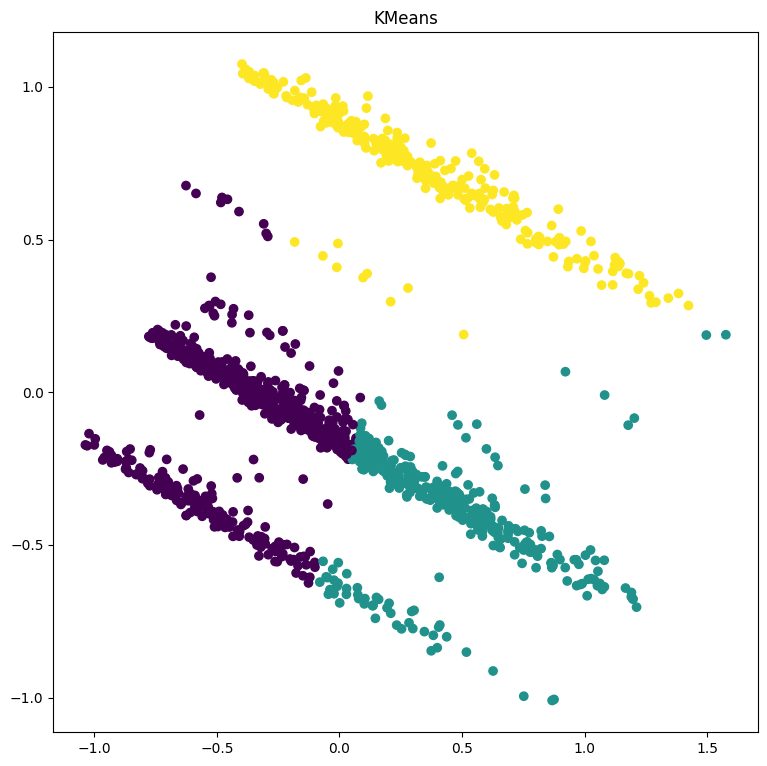

In [23]:
x = pcaf(df2)
df2['KMeans'] = kmeansf(x)
visua(df2, x)

## 2.1 Выявление устойчивых зокономерностей и их описание

In [92]:
# В df2 Заменем столбец с форматированной датой на обычный 
df2 = df2.drop(columns=['Дата публикации'])
df2 = df2.join(df['Дата публикации'])
df2

Название вакансии  Описание вакансии  Название региона  Работодатель  \
0              0.000000           0.000000          0.000000      0.000000   
1              0.001302           0.000848          0.000000      0.001572   
2              0.002604           0.001696          0.000000      0.003145   
3              0.003906           0.002545          0.000000      0.004717   
4              0.005208           0.003393          0.000000      0.006289   
5              0.006510           0.004241          0.000000      0.007862   
6              0.007812           0.005089          0.000000      0.009434   
7              0.009115           0.005937          0.000000      0.011006   
8              0.010417           0.006785          0.000000      0.012579   
9              0.011719           0.007634          0.000000      0.012579   
10             0.013021           0.008482          0.111111      0.014151   
11             0.013021           0.009330          0.000000      0.014151   
12             0.014323           0.010178          0.000000      0.015723   
13             0.015625           0.011026          0.000000      0.017296   
14             0.016927           0.011874          0.000000      0.018868   
15             0.018229           0.012723          0.000000      0.020440   
16             0.019531           0.013571          0.222222      0.022013   
17             0.020833           0.014419          0.000000      0.023585   
18             0.022135           0.015267          0.000000      0.011006   
19             0.023438           0.016115          0.000000      0.025157   
20             0.024740           0.016964          0.000000      0.026730   
21             0.026042           0.017812          0.000000      0.028302   
22             0.027344           0.018660          0.000000      0.029874   
23             0.028646           0.019508          0.000000      0.012579   
24             0.029948           0.020356          0.111111      0.031447   
25             0.031250           0.021204          0.111111      0.033019   
26             0.032552           0.022053          0.000000      0.034591   
27             0.033854           0.022901          0.000000      0.036164   
28             0.035156           0.023749          0.333333      0.037736   
29             0.036458           0.024597          0.000000      0.039308   
30             0.037760           0.025445          0.000000      0.040881   
31             0.039062           0.026293          0.000000      0.042453   
32             0.040365           0.027142          0.000000      0.044025   
33             0.041667           0.027990          0.444444      0.045597   
34             0.042969           0.028838          0.000000      0.047170   
35             0.044271           0.029686          0.000000      0.048742   
36             0.045573           0.030534          0.222222      0.050314   
37             0.046875           0.031383          0.000000      0.051887   
38             0.048177           0.032231          0.000000      0.053459   
39             0.045573           0.033079          0.000000      0.055031   
40             0.049479           0.033927          0.555556      0.014151   
41             0.009115           0.034775          0.000000      0.056604   
42             0.050781           0.035623          0.000000      0.023585   
43             0.052083           0.036472          0.000000      0.058176   
44             0.046875           0.037320          0.000000      0.059748   
45             0.053385           0.038168          0.000000      0.044025   
46             0.054688           0.039016          0.000000      0.061321   
47             0.055990           0.039864          0.000000      0.003145   
48             0.057292           0.040712          0.000000      0.062893   
49             0.058594           0.041561          0.111111      0.064465   
50             0.045573     

In [93]:
sp = ['Требования к знанию языков','isHighSchool']

In [94]:
# создание функции для вывода изменений значений по всем атрибутам внутри кластера
def vis(cluster):
    # цикл для прохода по всем атрибутам
    for i in sp:
        # настраивание размера фигуры
        plt.figure(figsize=(10, 5))
        # заголовок
        plt.title(i)
        # построение графика
        sns.lineplot(x=df2[df2["KMeans"]==cluster]["Дата публикации"].dt.month, y=df2[df2["KMeans"]==cluster][i])
        plt.show()

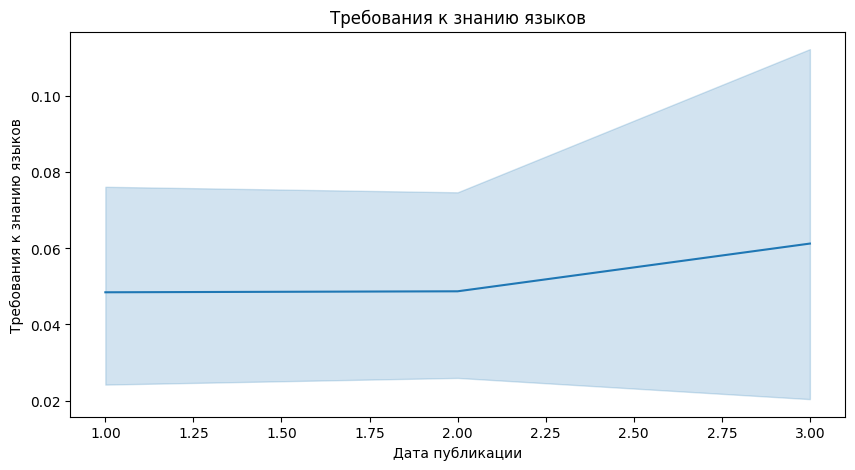

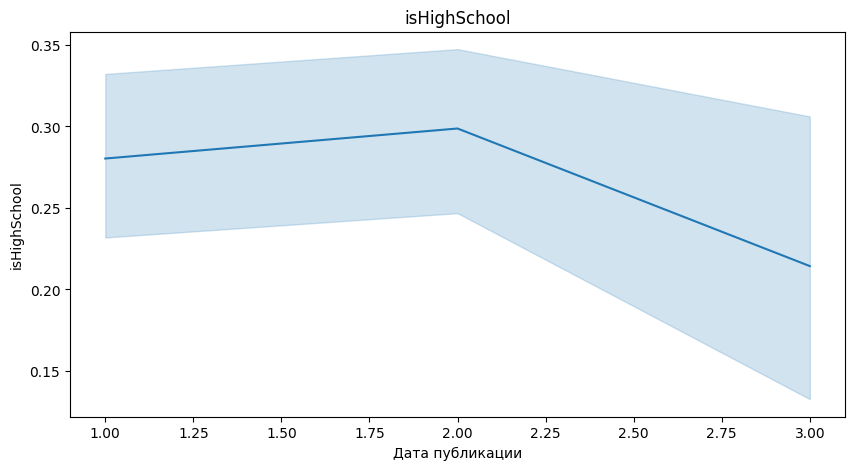

In [95]:
# выведем изменение значений всех атрибутов в кластере 0
vis(0)

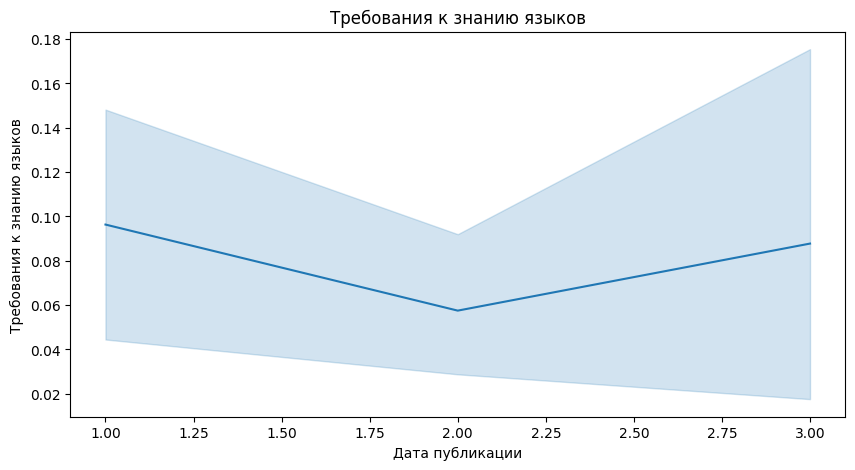

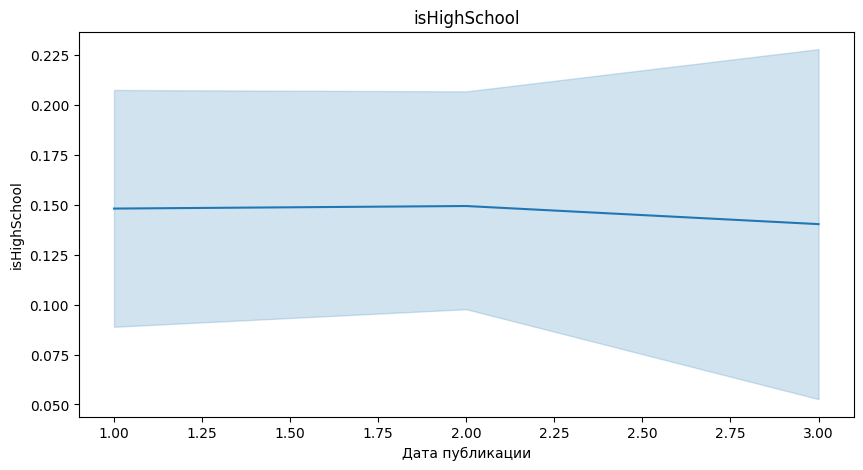

In [96]:
vis(1)

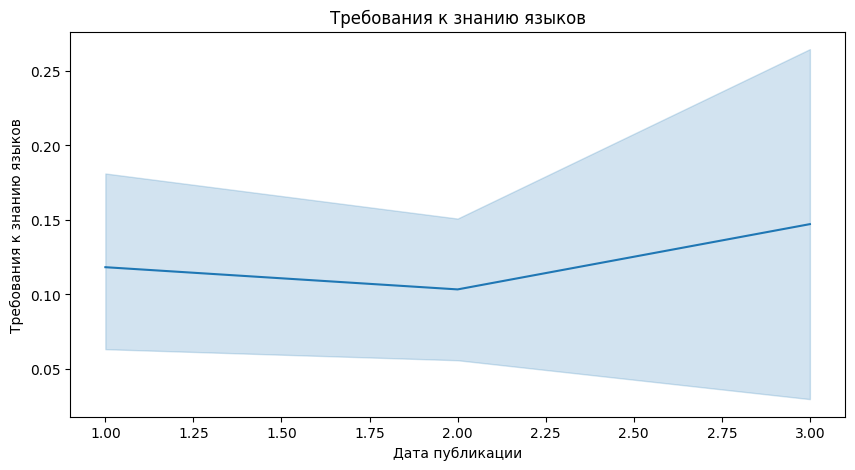

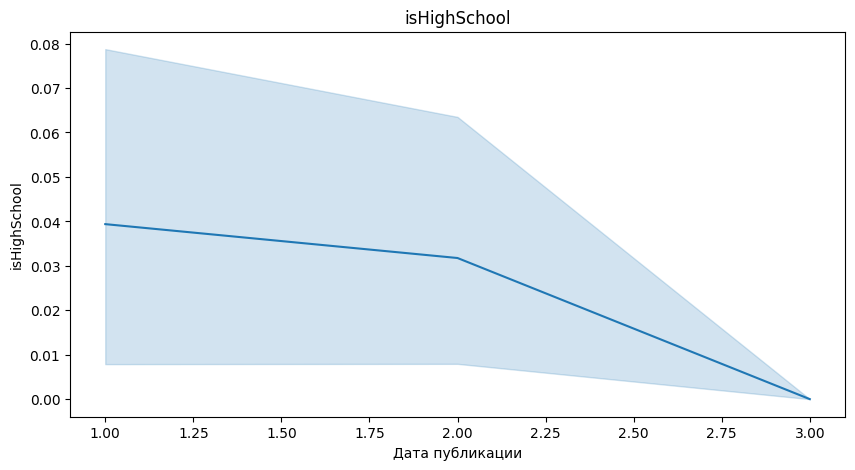

In [97]:
vis(2)

In [34]:
import math
start = 1
quantity = 9
step = 0.25
array = []
while(quantity > 0):
    array.append(round(start, 3))
    start += step
    quantity -= 1
print(array)

[1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0]


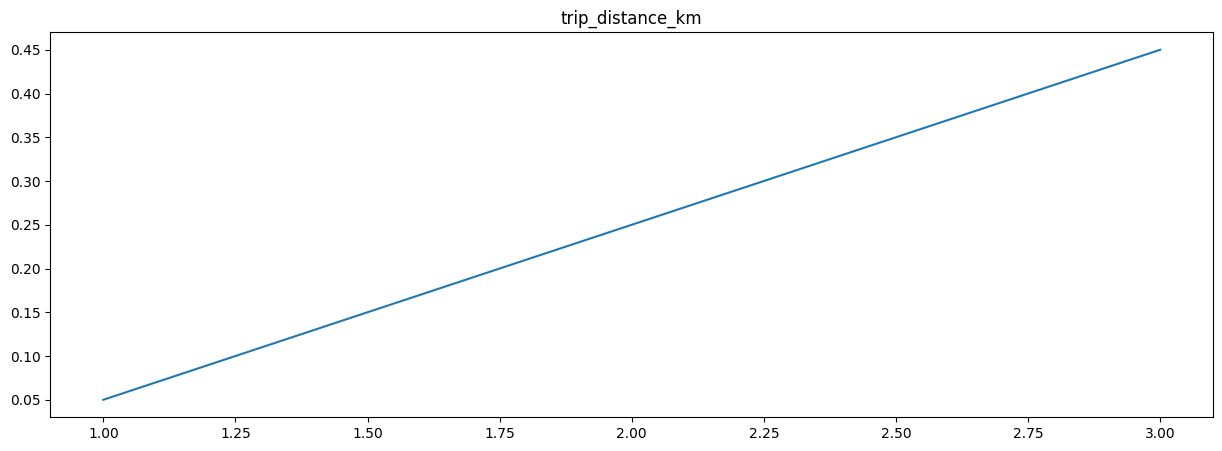

In [35]:
# настраивание размера графиков
plt.figure(figsize=(15, 5))
# настраиваем заголовок
plt.title("trip_distance_km")
# строим график
sns.lineplot(y = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45], x = [1, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0])
# отображаем график
plt.show()

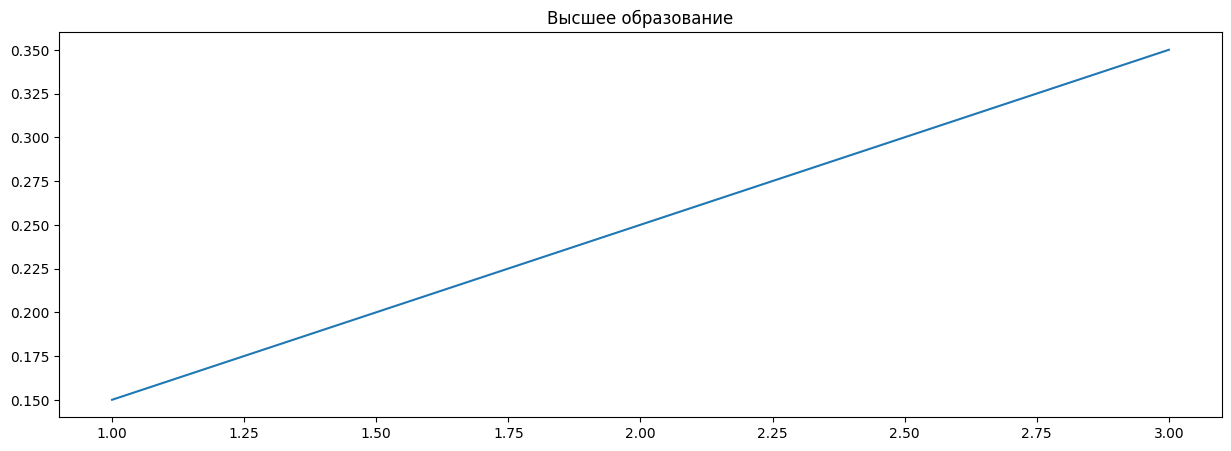

In [130]:
plt.figure(figsize=(10, 5))
# заголовок
plt.title("Высшее образование")
# построение графика
sns.lineplot(x=df2[df2["KMeans"]==0]["Дата публикации"].dt.month, y=df2[df2["KMeans"]==0]["isHighSchool"])
plt.show()

В атрибуте "Высшее образование" наблюдается стабильный рост значений из-за растущих требований рынка труда к специализированным навыкам и конкурентной среды.

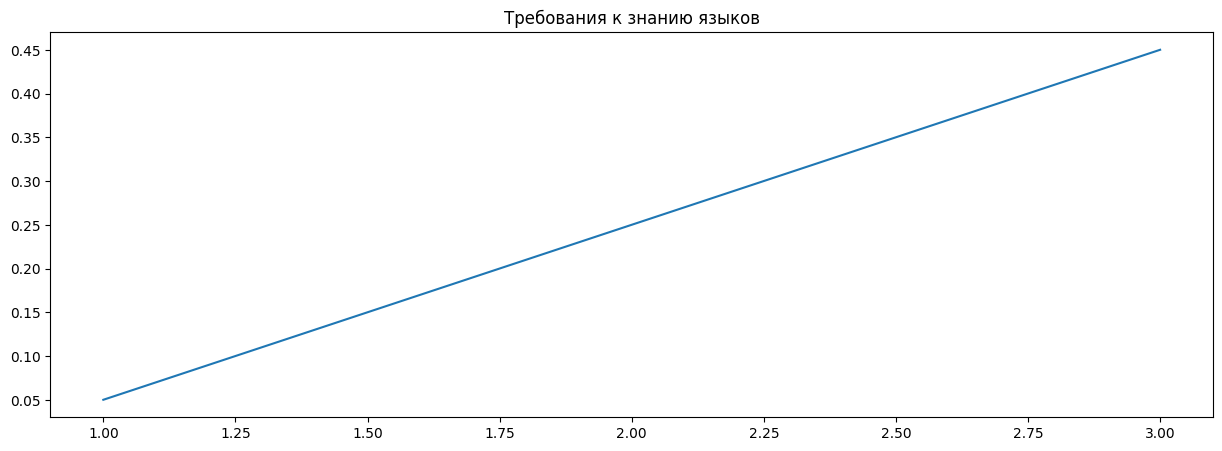

In [144]:
plt.figure(figsize=(10, 5))
# заголовок
plt.title("Требования к знанию языков")
# построение графика
sns.lineplot(x=df2[df2["KMeans"]==0]["Дата публикации"].dt.month, y=df2[df2["KMeans"]==0]["isHighSchool"])
plt.show()

В атрибуте "Требования к знанию языков" наблюдается стабильный рост значений из-за глобализации бизнеса, необходимости в межкультурном взаимодействии, конкурентного преимущества на рынке труда и возможностей карьерного роста.

## 2.2 Программно выполнен анализ зависимости между доходом и уровнем образования

In [98]:
df['Заработная плата'] = df['Заработная плата'].replace(0, 70000)

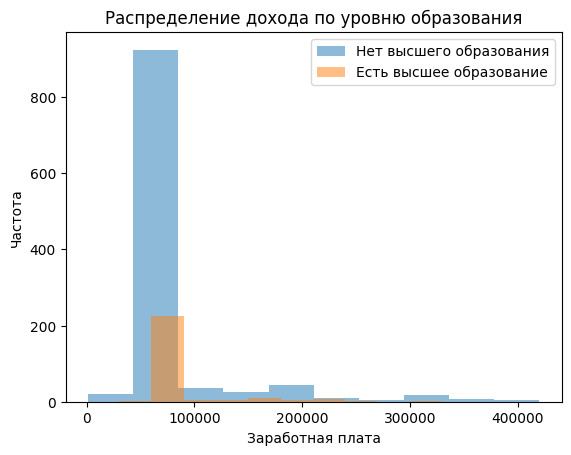

In [99]:
# Построение гистограмм распределения дохода для каждого уровня образования
ax = df.groupby('isHighSchool')['Заработная плата'].plot(kind='hist', alpha=0.5, legend=True)
plt.xlabel('Заработная плата')
plt.ylabel('Частота')
plt.title('Распределение дохода по уровню образования')

# Замена значений в легенде
plt.legend(['Нет высшего образования', 'Есть высшее образование'])

plt.show()


График демонстрирует, что высшее образование не всегда является определяющим фактором для получения высокой зарплаты

# 3. Фильтрация данных 

## 3.1 Распределены количественные переменные на категории или интервалы для упрощения анализа (секционирование данных)

Разделим заработную плату на соотвествующие интервалы

In [100]:
# Создание интервалов для секционирования данных
bins = [0, 50000, 70000, 100000, 200000, 350000, 500000]  # Пример интервалов дохода

# Создание категорий на основе интервалов
categories = ['0-50000', '50001-70000', '70001-100000', '100001-200000', '200001-350000', '350001-500000']

# Применение метода pd.cut() к переменной "Заработная плата"
df['Заработная плата категория'] = pd.cut(df['Заработная плата'], bins=bins, labels=categories)

# Вывод строк с новой переменной
print(df[['Заработная плата', 'Заработная плата категория']])


      Заработная плата Заработная плата категория
0                70000                50001-70000
1                70000                50001-70000
2                70000                50001-70000
3                70000                50001-70000
4               230000              200001-350000
5                70000                50001-70000
6                70000                50001-70000
7                70000                50001-70000
8                70000                50001-70000
9                70000                50001-70000
10               70000                50001-70000
11               70000                50001-70000
12              100000               70001-100000
13              200000              100001-200000
14              200000              100001-200000
15               70000                50001-70000
16               35000                    0-50000
17               70000                50001-70000
18               70000                50001-70000


## 3.2 Определены и отфильтрованы коррелирующие переменные, которые могут исказить данные анализа

In [101]:
# Рассчитать матрицу корреляции
correlation_matrix = df2.corr()

# Установить порог корреляции
threshold = 0.5

# Найти переменные с корреляцией больше заданного порога
correlated_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)

# Удалить коррелирующие переменные из датафрейма
df_filtered = df2.drop(columns=correlated_features)

print(f'Столбцы, которые могут исказить данные анализа: {correlated_features}')

Столбцы, которые могут исказить данные анализа: {'Описание вакансии', 'Удаленная работа', 'KMeans', 'Ключевые навыки', 'Работодатель'}


# 4. Подготовка аналитической справки / дашборда

### Построение интерактивного дашборда/аналитической записки:

- Интерактивный дашборд построен успешно.
- Построен график динамики количества вакансий по неделям/месяцам.
- Все элементы присутствуют в дашборде.
- Визуализация наглядно отражает рост или снижение показателей.

### Поиск зависимостей:

- Кластеры сопоставлены по вакансиям.
- Выявлены не менее двух характеристик, проявляющих устойчивые закономерности.
- Выполнено описание этих закономерностей.
- Программно выполнен анализ зависимости между доходом и уровнем образования.

### Фильтрация данных:

- Распределены количественные переменные на категории или интервалы для упрощения анализа (секционирование данных).
- Интеграция с базами данных и другими источниками данных для регулярного обновления информации на дашборде выполнена.
- Определены и отфильтрованы коррелирующие переменные, которые могут исказить данные анализа.

### Подготовка аналитической справки/дашборда:

- Отчет присутствует.
- Отчет охватывает результаты всей сессии и выполнен профессионально.

### Проектирование информационно-аналитических систем:

- Реализованы методы защиты данных, представленные в дашборде.
- Предусмотрена возможность настройки доступа к информации в соответствии с ролями пользователей и уровнем их компетенций в анализе данных.
- Интерфейс дашборда соответствует требованиям.